In [1]:
import random
import networkx
import matplotlib.pyplot as plt
%matplotlib inline

# Rule

In [2]:
# 定义语法内容
grammar = '''
sentence = adj noun verb adj noun2
adj = adj_single 和 adj_single 的 | null
adj_single = 漂亮 | 蓝色 | 好看
adv = 安静地 | 静静地
noun = 猫 | 女人 | 男人
verb = adv 看着 | adv 坐着
noun2 = 桌子 | 皮球
'''

In [3]:
# 定义语法创建函数
def build_grammar(grammar_str, split='='):
    grammar_pattern = {}
    for line in grammar_str.split('\n'):
        if not line: continue
        stmt, expr = line.split(split)
        grammar_pattern[stmt.strip()] = [e.split() for e in expr.split('|')]
    return grammar_pattern

In [4]:
grammar_pattern = build_grammar(grammar)

In [5]:
grammar_pattern

{'sentence': [['adj', 'noun', 'verb', 'adj', 'noun2']],
 'adj': [['adj_single', '和', 'adj_single', '的'], ['null']],
 'adj_single': [['漂亮'], ['蓝色'], ['好看']],
 'adv': [['安静地'], ['静静地']],
 'noun': [['猫'], ['女人'], ['男人']],
 'verb': [['adv', '看着'], ['adv', '坐着']],
 'noun2': [['桌子'], ['皮球']]}

In [6]:
def generate(grammar_pattern, target):
    if target not in grammar_pattern: return target
    expr = random.choice(grammar_pattern[target])
    tokens = [generate(grammar_pattern, e) for e in expr]
    return ''.join([t for t in tokens if t != 'null'])

In [7]:
generate(grammar_pattern, 'sentence')

'好看和蓝色的男人静静地坐着漂亮和好看的皮球'

# Search

In [8]:
# 合并广度优先和深度优先搜索
def search(graph, concat_func):
    seen = set()
    need_visited = ['1']
    while need_visited:
        node = need_visited.pop(0)
        if node in seen: continue
        print(   'I am looking at : {}'.format(node))
        seen.add(node)
        new_discoveried = graph[node]
        need_visited = concat_func(new_discoveried, need_visited)

In [9]:
def treat_new_discoveried_more_important(new_discoveried, need_visited):
    return new_discoveried + need_visited

In [10]:
def treat_already_dicoveried_more_important(new_discoveried, need_visited):
    return need_visited + new_discoveried

In [11]:
graph_long = {
    '1': '2 7',
    '2': '3',
    '3': '4',
    '4': '5',
    '5': '6 10',
    '6': '5',
    '7': '8',
    '8': '9',
    '9': '10',
    '10': '5 11',
    '11': '12',
    '12': '11'
}

In [13]:
for n in graph_long: graph_long[n] = graph_long[n].split()
graph_long

{'1': ['2', '7'],
 '2': ['3'],
 '3': ['4'],
 '4': ['5'],
 '5': ['6', '10'],
 '6': ['5'],
 '7': ['8'],
 '8': ['9'],
 '9': ['10'],
 '10': ['5', '11'],
 '11': ['12'],
 '12': ['11']}

In [14]:
search(graph_long, treat_already_dicoveried_more_important)

I am looking at : 1
I am looking at : 2
I am looking at : 7
I am looking at : 3
I am looking at : 8
I am looking at : 4
I am looking at : 9
I am looking at : 5
I am looking at : 10
I am looking at : 6
I am looking at : 11
I am looking at : 12


In [15]:
search(graph_long, treat_new_discoveried_more_important)

I am looking at : 1
I am looking at : 2
I am looking at : 3
I am looking at : 4
I am looking at : 5
I am looking at : 6
I am looking at : 10
I am looking at : 11
I am looking at : 12
I am looking at : 7
I am looking at : 8
I am looking at : 9


In [16]:
from functools import partial

In [17]:
dfs = partial(search, concat_func=treat_new_discoveried_more_important)

In [18]:
dfs(graph_long)

I am looking at : 1
I am looking at : 2
I am looking at : 3
I am looking at : 4
I am looking at : 5
I am looking at : 6
I am looking at : 10
I am looking at : 11
I am looking at : 12
I am looking at : 7
I am looking at : 8
I am looking at : 9


In [19]:
bfs = partial(search, concat_func=treat_already_dicoveried_more_important)

In [20]:
bfs(graph_long)

I am looking at : 1
I am looking at : 2
I am looking at : 7
I am looking at : 3
I am looking at : 8
I am looking at : 4
I am looking at : 9
I am looking at : 5
I am looking at : 10
I am looking at : 6
I am looking at : 11
I am looking at : 12


In [21]:
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLG = 'Heilongjiang'
NY = 'New York City'
CM = 'Chiangmai'
SG = 'Singapore'

In [22]:
air_route = {
    BJ: {SZ, GZ, WH, HLG, NY},
    GZ: {WH, BJ, CM},
    SZ: {BJ, SG},
    WH: {BJ, GZ},
    HLG: {BJ},
    CM: {GZ},
    NY: {BJ}
}

In [23]:
air_route = networkx.Graph(air_route)

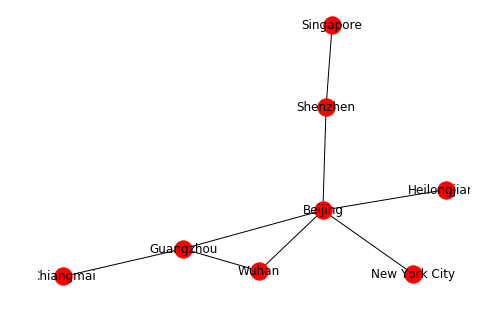

In [28]:
networkx.draw(air_route, with_labels=True)

In [25]:
def search_desitination(graph, start, desitination):
    pathes = [[start]]
    seen = set()
    chosen_pathes = []
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in seen: continue
        # get new lines
        for city in graph[frontier]:
            if city in path: continue
            new_path = path + [city]
            pathes.append(new_path)
            if city == desitination: return new_path
        seen.add(frontier)
    return chosen_pathes

In [26]:
def draw_route(cities): return ' ✈️ -> '.join(cities)

In [27]:
draw_route(search_desitination(air_route, SG, CM))

'Singapore ✈️ -> Shenzhen ✈️ -> Beijing ✈️ -> Guangzhou ✈️ -> Chiangmai'